<a href="https://colab.research.google.com/github/Lakshman142/FMML_Assignments/blob/main/CLF1_Lab3(NLP_Tools).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-3 : Using KNN for Text Classification
#### Module Coordinator: Tanvi Kamble


---

## **Section 1: Understanding NLP tools** 

In this lab we will be using KNN on a real world NLP application i.e. is text classification. But first look at some NLP techniques for text classification and tools that we use when we want to use python for NLP.

## Section 1.2: Data Cleaning and Preprocessing step

Raw text must be processed and converted into a form so that it is suitable to use with various machine-learning algorithms.  
In case of text, there are lots of things that need to be taken into account.  


1.   Removing numbers from the text
2.   Handling capitalization and punctuation.
3.   Stemming and Lemmatizing text.  

And most importantly, one can't just use words or images directly in algorithms; they need to be converted into vectors- a form that algorithms can understand.



### **NLTK** 
NLTK (or Natural Language Tool Kit) is a commonly used library for processing text. We will use this tool in this lab. Lets first install it. 


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [1]:
import re
import numpy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup

def cleanText(text, lemmatize, stemmer):
    """Method for cleaning text from train and test data. Removes numbers, punctuation, and capitalization. Stems or lemmatizes text."""

    if isinstance(text, float):
        text = str(text)
    if isinstance(text, numpy.int64):
        text = str(text)
    try:
        text = text.decode()
    except AttributeError: 
        pass

    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text()
    text = re.sub(r"[^A-Za-z]", " ", text)
    text = text.lower()


    if lemmatize:
        wordnet_lemmatizer = WordNetLemmatizer()

        def get_tag(tag):
            if tag.startswith('J'):
                return wordnet.ADJ
            elif tag.startswith('V'):
                return wordnet.VERB
            elif tag.startswith('N'):
                return wordnet.NOUN
            elif tag.startswith('R'):
                return wordnet.ADV
            else:
                return ''

        text_result = []
        tokens = word_tokenize(text)  # Generate list of tokens
        tagged = pos_tag(tokens)
        for t in tagged:
            try:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0], get_tag(t[1][:2])))
            except:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0]))
        return text_result

    if stemmer:
        text_result = []
        tokens = word_tokenize(text)
        snowball_stemmer = SnowballStemmer('english')
        for t in tokens:
            text_result.append(snowball_stemmer.stem(t))
        return text_result

In [3]:
sample_text = "Troubling"
sample_text_result = cleanText(sample_text, lemmatize=False, stemmer=True)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text)
print(sample_text_result)
sample_text_result = cleanText(sample_text, lemmatize=True, stemmer=False)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text_result)

Troubling
troubl
trouble


## Section 1.2: BAG OF WORDS 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in many ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. 
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [4]:
# Functions to convert document(s) to a list of words, with the option of removing stopwords. Returns document-term matrix.

def createBagOfWords(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = CountVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer = CountVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    bag_of_words_train = vectorizer.fit_transform(clean_train).toarray()
    bag_of_words_test = vectorizer.transform(clean_test).toarray()
    return bag_of_words_train, bag_of_words_test


## Section 1.3: TF-IDF 
TF-IDF technique is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

The number of times a term occurs in a document is called its Term frequency (TF).

 Document frequency is the number of documents in which the word is present.  Inverse DF (IDF) is the inverse of the document frequency which measures the informativeness of term *t*. 




In [5]:
def createTFIDF(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = TfidfVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    tfidf_train = vectorizer.fit_transform(clean_train).toarray()
    tfidf_test = vectorizer.transform(clean_test).toarray()
    return tfidf_train, tfidf_test

# **Section 2: UNDERSTANDING THE DATA : A REVIEWS DATASET**

Sentiment analysis is the interpretation and classification of emotions (such as positive, negative and neutral) within text data using text analysis techniques.  
Given below is a dataset consisting of reviews along with sentiment class (positive or negative).

In [6]:
# Upload the Reviews CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [7]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [8]:
df = df.dropna()

In [9]:
df.to_csv('reviews.csv', index=False)

# **Section 3: KNN MODEL**

Given below are two KNN models; in the first case we are using Bag-of-Words and in the second case we are using TF-IDF.
Note the different metrics and parameters used in each.

In [17]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 1: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=45, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

Note: Cross-validation will be discussed in detail in the upcoming lab session.

In [14]:
## KNN accuracy after using BoW
predicted, y_test = bow_knn()

KNN with BOW accuracy = 70.15706806282722%
Cross Validation Accuracy: 0.69
[0.70588235 0.6627451  0.70472441]




/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [18]:
## KNN accuracy after using TFIDF
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 70.68062827225131%
Cross Validation Accuracy: 0.73
[0.72941176 0.76470588 0.69685039]


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


# Section 4: SPAM TEXT DATASET
Now let's use what we've learnt to classify texts as spam or not spam.

In [19]:
# Upload the spam text data CSV file that has been shared with you. You can also download the file from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [20]:
import pandas as pd
df = pd.read_csv('spam.csv', error_bad_lines=False)
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [21]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [22]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
len(df)

5572

In [34]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 2: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', leaf_size=45, p=4, metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [26]:
# This cell may take some time to run
predicted, y_test = bow_knn()

KNN with BOW accuracy = 98.47533632286995%
Cross Validation Accuracy: 0.97
[0.96096904 0.9717362  0.96969697]




In [36]:
# This cell may take some time to run
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 98.56502242152466%
Cross Validation Accuracy: 0.97
[0.96837147 0.96769852 0.96363636]


### Questions to Think About and Answer
1. Why does the TF-IDF approach generally result in a better accuracy than Bag-of-Words ?
2. Can you think of techniques that are better than both BoW and TF-IDF ?
3. Read about Stemming and Lemmatization from the resources given below. Think about the pros/cons of each.

## **ANSWERS**

1. Bag-of-Words does not represent the contest of the test. That is a drawback of the BoM, Distance between words like (car,care) and (car,carriage) is same.But the words car and care are so different regarding their context, while car and carriage are somewhat similar.TF-IDF assigns weights to the words that depend on the context  of the word.Weights in the TF-IDF are calculated as below


> 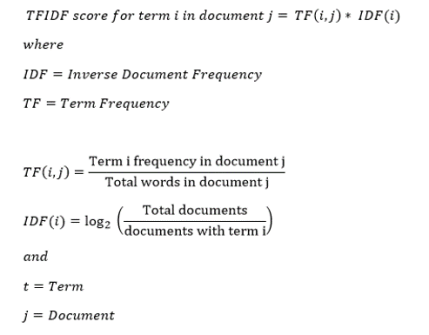

2. **Word2Vec** is another text to vector convertion technique. It focuses on retaining the semantic structure of the words in the document. Consider the words like (king,queen) ,(male,female) , the distance and direction between the king and queen, male and female are same. This also helps in performing vector arithematics.

3. **Pros and Cons of Stemming:**
    Stemmiing is computationally faster than lemmatization.There would be inaccuracies in the result of the stemming,Because stemming works by chopping off the ends of the word expecting the stem Sometimes this may not return the correct goal stem.
    
    **Example:** 'saw' on stemming would return 's'.
  
  **Pros and Cons of Lemmatization:**
    Lemmatization is computaionally slower and uses part-of-speech(PoS) for analysis.Lemmatization gives real words or lemma depending on PoS.
    
    **Example:** 'saw' on lemmatizing would return 'see' or 'saw' depending on 'PoS'.


### Useful Resources for further reading
1. Stemming and Lemmatization: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. TF-IDF and BoW : https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
3. TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
